# **GRU Exercise**

## Import libraries

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [3]:
df = pd.read_csv('/content/traffic.csv')


## Data Exploration



In [4]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Feature Engineering (if needed)



In [12]:
#we will use the vehicle as our target value
data = df[['Vehicles']]
data.head()
data.shape

#normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scale_data = scaler.fit_transform(np.array(data))

# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

#define seq length for 240 days
seq_length = 240

# Create the sequences
X, y = create_sequences(scale_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

## Exploratory Data Analysis


In [13]:
data.shape

(48120, 1)

In [14]:
data.sample(1)

,Vehicles
46120,5


## split into train and test sets

In [15]:
# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [17]:

# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



## Fitting The Model



In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 0.0020 - val_loss: 9.0883e-04
Epoch 2/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 7.6575e-04 - val_loss: 0.0012
Epoch 3/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 6.9596e-04 - val_loss: 8.2282e-04
Epoch 4/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 6.1117e-04 - val_loss: 7.6338e-04
Epoch 5/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 5.7122e-04 - val_loss: 7.6456e-04
Epoch 6/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 5.9307e-04 - val_loss: 7.6592e-04
Epoch 7/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - loss: 5.3212e-04 - val_loss: 7.9802e-04
Epoch 8/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 5.6366e-04 - val_loss: 7.3266e-04
Epoch 9/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 5.6471e-04 - val_loss: 9.4647e-04
Epoch 10/10
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - loss: 5.2517e-04 - val_loss: 7.6391e-04


## Make preductuion and evaluatuin matrix.

In [19]:
# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


## Visualize the result

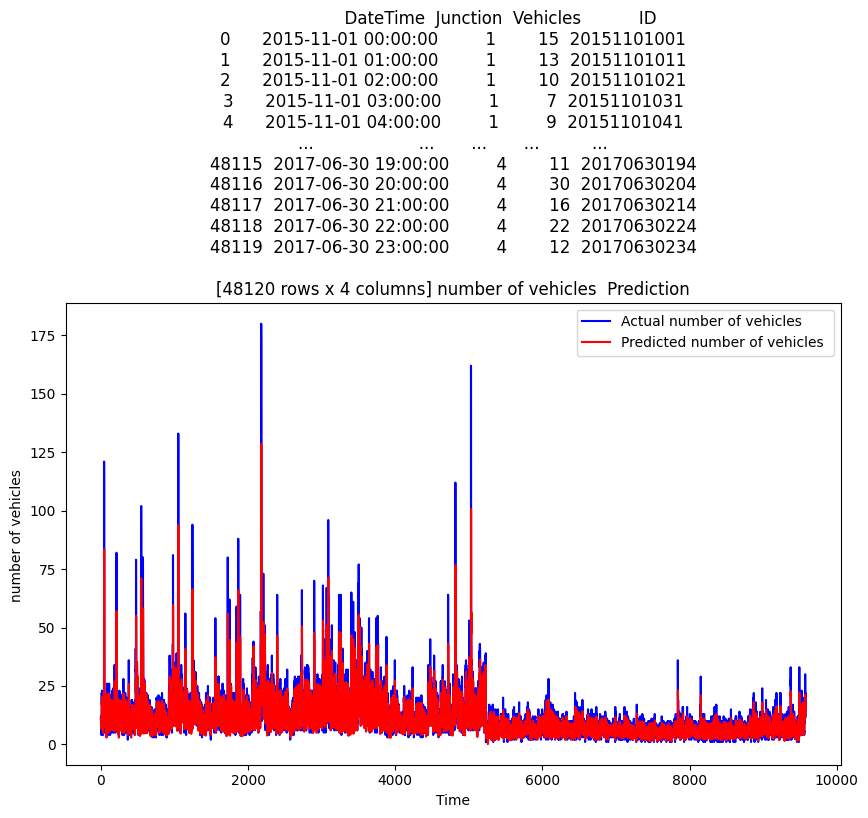

In [21]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual number of vehicles ')
plt.plot(predicted_stock_price, color='red', label='Predicted number of vehicles ')
plt.title(f'{df} number of vehicles  Prediction')
plt.xlabel('Time')
plt.ylabel('number of vehicles ')
plt.legend()
plt.show()


# **Well done** :)